# Working with the healthcare dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
%matplotlib inline

import sqlite3

In [3]:
# [conn = sqlite3.connect("../Data/health_insurance/database.sqlite")
# df = pd.read_sql_query("select * from airlines limit 5;", conn)
# df]

### Importing datasets

In [6]:
df_rate = pd.read_csv('../Data/health_insurance/Rate.csv')
df_rate.sample(frac=.3)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
323936,2014,FL,16842,HIOS,6,2014-01-17 09:36:20,16842,59-2015694,2014-01-01,2014-12-31,...,299.89,359.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24553
5737196,2015,SC,49532,HIOS,20,2015-01-16 17:32:32,49532,57-0768835,2015-04-01,2015-06-30,...,326.84,392.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24027
5141539,2015,NC,11512,HIOS,9,2015-01-16 17:32:32,11512,56-0894904,2015-01-01,2015-12-31,...,366.49,439.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13749
6716954,2015,WI,77525,HIOS,2,2014-08-08 08:53:29,77525,72-0977315,2015-01-01,2015-12-31,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1202
5417425,2015,PA,22444,HIOS,11,2014-11-14 05:23:27,22444,23-2311553,2015-01-01,2015-12-31,...,681.94,750.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3647
285921,2014,FL,16842,HIOS,6,2014-01-17 09:36:20,16842,59-2015694,2014-01-01,2014-12-31,...,337.77,405.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5546
10758743,2016,TX,23891,HIOS,7,2015-08-26 09:56:12,23891,74-2447512,2016-01-01,2016-12-31,...,15.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973
5128455,2015,NC,11512,HIOS,9,2015-01-16 17:32:32,11512,56-0894904,2015-07-01,2015-09-30,...,442.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8166
7624754,2015,MI,41895,SERFF,8,2015-02-22 21:18:17,41895,45-3758112,2015-07-01,2015-09-30,...,357.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4533
97173,2014,AZ,30045,HIOS,5,2014-03-19 07:06:49,30045,86-0274899,2014-01-01,2014-12-31,...,49.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5917


In [7]:
df_plans = pd.read_csv('../Data/health_insurance/PlanAttributes.csv')

/home/roland/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,7,8,9,10,11,12,13,14,15,18,19,20,22,23,24,25,26,27,28,29,31,32,33,34,39,40,41,42,66,67,68,70,71,72,75,76,77,79,80,81,82,84,85,86,88,89,90,92,93,94,96,97,98,136,137,138,140,141,142,145,146,147,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
#df_plan_service = pd.read_csv('../Data/health_insurance/ServiceArea.csv')

In [9]:
# Helpful function to look through the columns of a dataframe
def eda_helper(df):
    dict_list = []
    for col in df.columns:
        data = df[col]
        dict_ = {}
        # The null count for a column. 
        dict_.update({"null_count" : data.isnull().sum()})
        # Counting the unique values in a column
        dict_.update({"unique_count" : len(data.unique())})
        # Finding the types of data in the column
        # This is useful for finding out potential problems with type mismatches
        dict_.update({"data_type" : set([type(d).__name__ for d in data])})
        dict_list.append(dict_)
    eda_df = pd.DataFrame(dict_list)
    eda_df.index = df.columns
    eda_df = eda_df.sort_values(by='null_count')
    
    return eda_df

So there appear to be duplicates in the 2014 dataset for plans. I don't know why they exist, but in the iterest of moving forward I am going to drop them

In [10]:
df_plans.drop_duplicates(inplace=True, subset='PlanId')

In [11]:
pd.options.display.max_rows = 999
eda_helper(df_plans)

,data_type,null_count,unique_count
HIOSProductId,{str},0,3497
RowNumber,{int64},0,242
QHPNonQHPTypeId,{str},0,3
PlanType,{str},0,5
PlanMarketingName,{str},0,8191
PlanId,{str},0,52394
PlanEffictiveDate,{str},0,5
ServiceAreaId,{str},0,446
IssuerId,{int64},0,910
OutOfServiceAreaCoverage,{str},0,4


In [12]:
df_plans['PlanId_clean'] = df_plans.PlanId.apply(lambda a : a[:-3])


In [13]:
df_plans = df_plans.merge(df_rate, left_on= 'PlanId_clean', right_on='PlanId')

MemoryError: 

### Building model dataframe

In [8]:
#df_rate.groupby(['PlanId','StateCode', 'RatingAreaId','Age','Tobacco']).count().nlargest(10,'BusinessYear')

df_rate['location']  = df_rate['StateCode'] + df_rate['RatingAreaId']

In [9]:
df_rate.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber,location
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,AKRating Area 1
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14,AKRating Area 1
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15,AKRating Area 2
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,AKRating Area 1
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,AKRating Area 1


In [111]:
df_rate_clean = df_rate[df_rate.Age != 'Family Option']
df_rate_clean = df_rate_clean[(df_rate_clean.IndividualRate > 80) & (df_rate_clean.IndividualRate.isnull != True) & (df_rate_clean.IndividualRate != 99.99) & (df_rate_clean.IndividualRate < 2000) & (df_rate_clean.IndividualRate.isnull != 999)]
df_rate_clean = df_rate_clean[df_rate_clean.BusinessYear == 2016]
df_rate_clean.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber,location
8472570,2016,FL,27357,HIOS,4,2015-10-20 04:38:50,27357,59-3315064,2016-10-01,2016-12-31,...,207.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6090,FLRating Area 5
8472571,2016,FL,27357,HIOS,4,2015-10-20 04:38:50,27357,59-3315064,2016-01-01,2016-12-31,...,213.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6090,FLRating Area 5
8472572,2016,FL,27357,HIOS,4,2015-10-20 04:38:50,27357,59-3315064,2016-01-01,2016-12-31,...,214.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6091,FLRating Area 5
8472573,2016,FL,27357,HIOS,4,2015-10-20 04:38:50,27357,59-3315064,2016-10-01,2016-12-31,...,208.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6091,FLRating Area 5
8472574,2016,FL,27357,HIOS,4,2015-10-20 04:38:50,27357,59-3315064,2016-07-01,2016-09-30,...,204.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6091,FLRating Area 5


In [112]:
df_rate.columns

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'VersionNum',
       'ImportDate', 'IssuerId2', 'FederalTIN', 'RateEffectiveDate',
       'RateExpirationDate', 'PlanId', 'RatingAreaId', 'Tobacco', 'Age',
       'IndividualRate', 'IndividualTobaccoRate', 'Couple',
       'PrimarySubscriberAndOneDependent', 'PrimarySubscriberAndTwoDependents',
       'PrimarySubscriberAndThreeOrMoreDependents', 'CoupleAndOneDependent',
       'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents', 'RowNumber',
       'location'],
      dtype='object')

In [113]:
features = ['location', 'SourceName', 'Age']
#y = ['IndividualRate','IndividualTobaccoRate', 'Couple']
y=['IndividualRate']
df_rate_clean = df_rate_clean[df_rate_clean.IndividualRate.isnull() == False]
df_rate_clean = df_rate_clean.sample(frac=.1)

In [114]:
df_data = df_rate_clean[features]
target = df_rate_clean[y]

In [115]:
df_data = df_data.join(pd.get_dummies(df_data.location, drop_first=True))

In [116]:
df_data = df_data.join(pd.get_dummies(df_data.SourceName, drop_first=True))

In [117]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_data['age_encoded'] = df_data['Age'].str.replace('65 and over','65')
df_data['age_encoded'] = df_data['Age'].str.replace('65 and over ','65')
df_data['age_encoded'] = df_data['Age'].str.replace('0-20', '20')
df_data.head()

,location,SourceName,Age,AKRating Area 2,AKRating Area 3,ALRating Area 1,ALRating Area 10,ALRating Area 11,ALRating Area 12,ALRating Area 13,...,WVRating Area 6,WVRating Area 7,WVRating Area 8,WVRating Area 9,WYRating Area 1,WYRating Area 2,WYRating Area 3,OPM,SERFF,age_encoded
11848895,MIRating Area 6,SERFF,64,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,64
10310554,SCRating Area 6,HIOS,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
11508261,IARating Area 2,SERFF,43,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,43
12180209,OHRating Area 2,SERFF,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,34
9623601,NCRating Area 7,HIOS,33,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33


In [118]:
# i = 0
# for a in df_data.age_encoded:
#     if a == '65 and over':
#         df_data.set_value(i, 'age_encoded', 65)
#     if a == '0-20':
#         df_data.set_value(i, 'age_encoded', 20)
#     i+=1


del df_data['Age']
del df_data['location']
del df_data['SourceName']
df_data['age_encoded'] = df_data['age_encoded'].str.replace('65 and over','65')
df_data['age_encoded'] = df_data['age_encoded'].str.replace('65 and over ','65')

In [119]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


lm = LinearRegression()

In [120]:
# df_data.to_csv('age_location_source.csv', index=False)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(df_data, target, test_size=0.33, random_state=43)

In [122]:

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [130]:
lm.score(X_test, y_test)

0.61393059613460133

In [124]:
lm.predict(X_test)

array([[ 548.51401873],
       [ 311.07224393],
       [ 618.91664051],
       ..., 
       [ 216.2077277 ],
       [ 142.20528741],
       [ 461.59701869]])

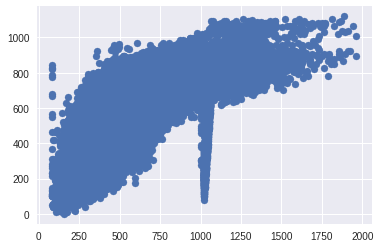

In [125]:
plt.scatter(x=y_train, y=lm.predict(X_train))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64f3e2ad30>]], dtype=object)

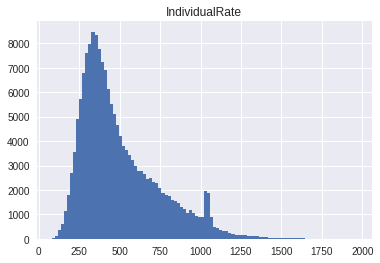

In [128]:
y_train.hist(bins=100)

In [131]:
list(zip(X_train.columns, lm.coef_[0]))

[('AKRating Area 2', -16.609118336894038),
 ('AKRating Area 3', -19.90495355025439),
 ('ALRating Area 1', -328.71875232106879),
 ('ALRating Area 10', -328.2633833011455),
 ('ALRating Area 11', -299.98771197759288),
 ('ALRating Area 12', -341.75538175242082),
 ('ALRating Area 13', -309.99397928188523),
 ('ALRating Area 2', -299.68987531048799),
 ('ALRating Area 3', -290.60543915421817),
 ('ALRating Area 4', -308.29180171808036),
 ('ALRating Area 5', -303.02748589289581),
 ('ALRating Area 6', -319.5434313844695),
 ('ALRating Area 7', -303.89208559589792),
 ('ALRating Area 8', -298.59326151322034),
 ('ALRating Area 9', -271.81902123383725),
 ('ARRating Area 1', -341.70198223221439),
 ('ARRating Area 2', -350.00767346024668),
 ('ARRating Area 3', -344.7615583043164),
 ('ARRating Area 4', -371.09154583706845),
 ('ARRating Area 5', -327.70317558888314),
 ('ARRating Area 6', -282.62868768067017),
 ('ARRating Area 7', -365.81326605227883),
 ('AZRating Area 1', -261.86242237809586),
 ('AZRating